## Importing main libraries

In [39]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
plt.style.use('ggplot')


## Importing Data set

In [40]:
df = pd.read_csv('./datasets/amazon_laptop_prices_v01.csv')

## Basic Understanding of data 

In [41]:
df.shape

(4446, 14)

In [42]:
df.head()

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
0,ROKC,NaN,14 Inches,Blue,1000 GB,Intel Core i7,8 GB,Windows 11,NaN,Integrated,Intel,1.2 GHz,NaN,$589.99
1,HP,NaN,15.6 Inches,Silver,1000 GB,Intel Core i5,64 GB,Windows 11 Pro,Backlit Keyboard,Integrated,Intel,NaN,4.5,$999.99
2,MSI,Vector GP66 12UGS-267,15.66 Inches,Core Black,NaN,Intel Core i9,32 GB,Windows 11 Home,NaN,Dedicated,NaN,1.8 GHz,5.0,"$1,599.00"
3,Apple,MacBook Air,13.3 Inches,Silver,256 GB,Unknown,8 GB,Mac OS,Backlit Keyboard,Integrated,NaN,NaN,4.8,$689.99
4,Apple,MacBook Air,15.3 Inches,Midnight,256 GB,Unknown,8 GB,Mac OS,NaN,Integrated,NaN,NaN,4.8,"$1,144.48"


In [43]:
df.tail()

,brand,model,screen_size,color,harddisk,cpu,ram,OS,special_features,graphics,graphics_coprocessor,cpu_speed,rating,price
4441,MSI,Stealth GS66 12UGS-025,15.6 Inches,Core Black,NaN,Intel Core i9,32 GB,Windows 11 Home,NaN,Dedicated,NVIDIA GeForce RTX 3070,1.8 GHz,1.0,"$1,699.00"
4442,ROKC,NaN,14 Inches,Blue,1000 GB,Intel Core i7,8 GB,Windows 11,NaN,Integrated,Intel,1.2 GHz,NaN,$589.99
4443,Dell,Inspiron 3511 Laptop,15.6 Inches,Black,512 GB,Core i3,8 GB,Windows 10 Home,Wifi & Bluetooth,Integrated,NaN,NaN,NaN,$591.99
4444,Dell,Latitude 3420 Laptop,14 Inches,NaN,512 GB,Core i5,8 GB,Windows 10 Pro,NaN,Integrated,Intel Integrated Graphics,0.9 GHz,NaN,"$1,771.99"
4445,Dell,Latitude 5430 Laptop,14 Inches,Black,256 GB,Core i5,NaN,Windows 11 Pro,NaN,Integrated,Intel Integrated Graphics,3.3 GHz,NaN,$938.99


In [44]:
df.columns

Index(['brand', 'model', 'screen_size', 'color', 'harddisk', 'cpu', 'ram',
       'OS', 'special_features', 'graphics', 'graphics_coprocessor',
       'cpu_speed', 'rating', 'price'],
      dtype='object')

In [45]:
df.dtypes

brand                    object
model                    object
screen_size              object
color                    object
harddisk                 object
cpu                      object
ram                      object
OS                       object
special_features         object
graphics                 object
graphics_coprocessor     object
cpu_speed                object
rating                  float64
price                    object
dtype: object

In [46]:
df.describe()

,rating
count,2174.000000
mean,4.086891
std,1.165337
min,1.000000
25%,4.000000
50%,4.500000
75%,5.000000
max,5.000000


## Data Processing

In [47]:
df = df[['brand', 'screen_size', 'harddisk', 'cpu', 'ram', 'graphics_coprocessor','cpu_speed', 'price' 
        #'model','OS', 'special_features', 'color','graphics', 'rating'
        ]]

In [48]:
df.shape

(4446, 8)

In [49]:
# Renaming the columns
df = df.rename(columns= {'brand': 'Brand', 'screen_size': 'Screen_Size', 'harddisk' : 'Hard_Disk', 'cpu' : 'CPU', 'ram' : 'RAM',
                        'graphics_coprocessor': 'Graphics_Coprocessor','cpu_speed': 'CPU_Speed', 'price' : 'Price'})
df.head()

,Brand,Screen_Size,Hard_Disk,CPU,RAM,Graphics_Coprocessor,CPU_Speed,Price
0,ROKC,14 Inches,1000 GB,Intel Core i7,8 GB,Intel,1.2 GHz,$589.99
1,HP,15.6 Inches,1000 GB,Intel Core i5,64 GB,Intel,NaN,$999.99
2,MSI,15.66 Inches,NaN,Intel Core i9,32 GB,NaN,1.8 GHz,"$1,599.00"
3,Apple,13.3 Inches,256 GB,Unknown,8 GB,NaN,NaN,$689.99
4,Apple,15.3 Inches,256 GB,Unknown,8 GB,NaN,NaN,"$1,144.48"


In [50]:
df['CPU_Speed'].fillna(0, inplace=True)
df['RAM'].fillna(0, inplace=True)

In [51]:
df.isna().sum()

Brand                      0
Screen_Size               29
Hard_Disk                576
CPU                      100
RAM                        0
Graphics_Coprocessor    1872
CPU_Speed                  0
Price                      5
dtype: int64

In [52]:
df.loc[df.duplicated()]
df.drop_duplicates(df.loc[df.duplicated()], inplace= True)

In [53]:
df.dropna(axis=0,subset=['CPU'], inplace= True)

In [54]:
df['RAM'] = df['RAM'].str.replace(' GB$', '', regex=True)
df['RAM'] = df['RAM'].str.replace('MB$','' , regex= True)
df['RAM'] = df['RAM'].astype(float)

In [55]:
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)

In [56]:
df['CPU_Speed'] = df['CPU_Speed'].str.replace(' GHz$', '', regex=True)
df['CPU_Speed'] = df['CPU_Speed'].str.replace(' Hz$', '', regex=True)
df['CPU_Speed'] = df['CPU_Speed'].str.replace(' MHz$', '', regex=True)
df['CPU_Speed'] = df['CPU_Speed'].replace('2.2, 3.9', np.nan)
df['CPU_Speed'] = df['CPU_Speed'].replace('9120', 0.9)
df['CPU_Speed'] = df['CPU_Speed'].replace('2133', 2.1)
df['CPU_Speed'] = df['CPU_Speed'].replace('3200', 3.2)
df['CPU_Speed'] = df['CPU_Speed'].fillna(0)
df['CPU_Speed'] = df['CPU_Speed'].astype(float)
df['CPU_Speed'].unique()

array([1.2 , 0.  , 1.8 , 1.1 , 5.6 , 2.1 , 2.6 , 3.4 , 4.5 , 2.2 , 2.4 ,
       5.  , 3.  , 4.7 , 2.8 , 1.3 , 3.7 , 2.3 , 5.1 , 4.4 , 1.7 , 5.2 ,
       2.  , 3.6 , 4.3 , 2.66, 4.1 , 4.  , 3.49, 1.6 , 3.3 , 2.5 , 4.8 ,
       1.  , 4.2 , 3.2 , 1.5 , 3.5 , 2.53, 2.7 , 3.8 , 1.4 , 4.6 , 1.9 ,
       0.9 , 2.9 , 3.1 , 3.9 ])

In [57]:
df['Screen_Size'] = df['Screen_Size'].str.replace(' Inches$', '', regex=True)
df['Screen_Size'] = df['Screen_Size'].astype(float) 

In [58]:
df['Hard_Disk'] = df['Hard_Disk'].str.replace(' GB$', '', regex=True)
df['Hard_Disk'] = df['Hard_Disk'].str.replace(' TB$', '', regex=True)
df['Hard_Disk'] = df['Hard_Disk'].replace(['64 MB', '512 MB'], np.nan )
df['Hard_Disk'] = df['Hard_Disk'].replace(['64', '32', '16', '65', '8'], np.nan )
df['Hard_Disk'] = df['Hard_Disk'].replace('1', 1000 )
df['Hard_Disk'] = df['Hard_Disk'].replace('2', 2000)
df['Hard_Disk'] = df['Hard_Disk'].replace('1.5', 1500)
df['Hard_Disk'] = df['Hard_Disk'].replace('3', 3000)
df['Hard_Disk'] = df['Hard_Disk'].replace(4, 4000)
df['Hard_Disk'] = df['Hard_Disk'].fillna(0)
df['Hard_Disk'] = df['Hard_Disk'].astype(int)


In [59]:
df['Brand'] = df['Brand'].replace({'acer': 'Acer', 'Dell': 'DELL', 'Asus': 'ASUS', 'dell': 'DELL','hp': 'HP','lenovo': 'Lenovo','LENOVO': 'Lenovo','asus': 'ASUS'},
                                regex= True)

## Feature Understanding


In [60]:
df.head()

,Brand,Screen_Size,Hard_Disk,CPU,RAM,Graphics_Coprocessor,CPU_Speed,Price
0,ROKC,14.00,1000,Intel Core i7,8.0,Intel,1.2,589.99
1,HP,15.60,1000,Intel Core i5,64.0,Intel,0.0,999.99
2,MSI,15.66,0,Intel Core i9,32.0,NaN,1.8,1599.00
3,Apple,13.30,256,Unknown,8.0,NaN,0.0,689.99
4,Apple,15.30,256,Unknown,8.0,NaN,0.0,1144.48


In [61]:
max_price = df['Price'].nlargest()
print(max_price)

3246    11261.24
2835     7399.00
1337     5599.00
2378     5598.29
1697     5499.00
Name: Price, dtype: float64


Text(0, 0.5, 'Count')

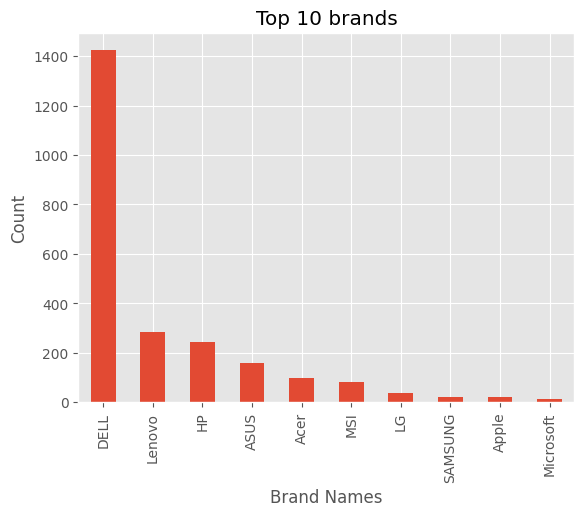

In [62]:
ax = df['Brand'].value_counts().head(10)\
    .plot(kind= 'bar', title= 'Top 10 brands')
ax.set_xlabel('Brand Names')
ax.set_ylabel('Count')

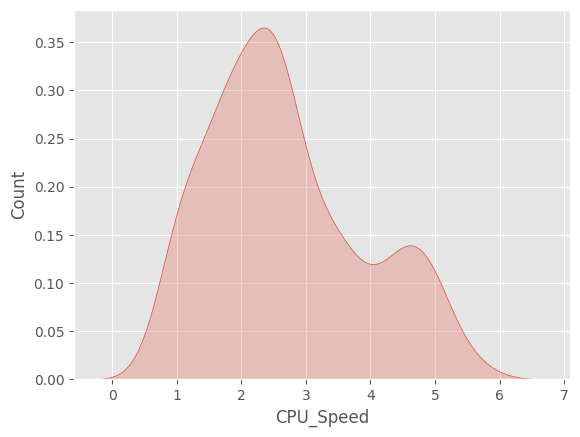

In [63]:
df_filtered = df[df['CPU_Speed'] != 0]

ax = sns.kdeplot(df_filtered['CPU_Speed'], fill= True)
ax.set_xlabel('CPU_Speed')
ax.set_ylabel('Count')

plt.show()

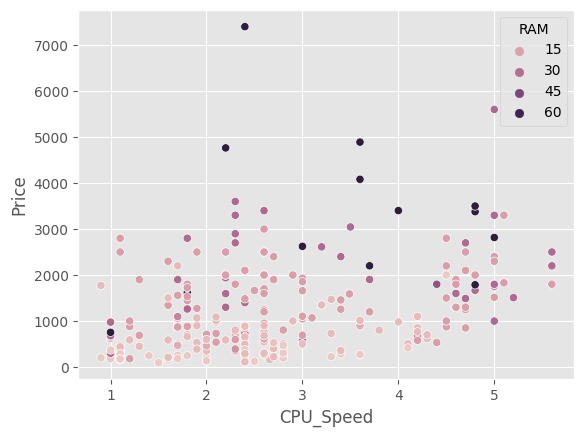

In [64]:
df_filtered = df[df['CPU_Speed'] != 0]
ax = sns.scatterplot(x='CPU_Speed', y='Price', hue='RAM', data=df_filtered)
plt.show()

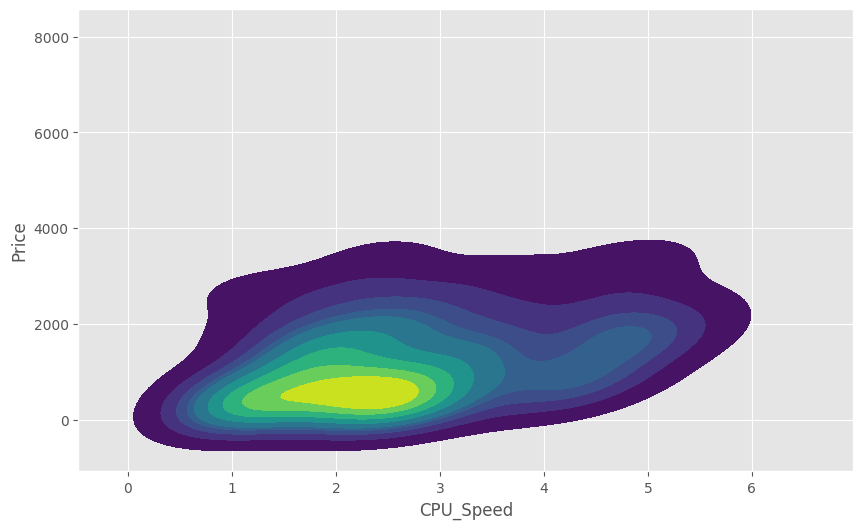

In [71]:
plt.figure(figsize=(10, 6))
df_filtered = df[df['CPU_Speed'] != 0]
sns.kdeplot(x = df_filtered['CPU_Speed'], y=df_filtered['Price'],cmap='viridis', fill=True, bw_adjust= 1)
plt.show()

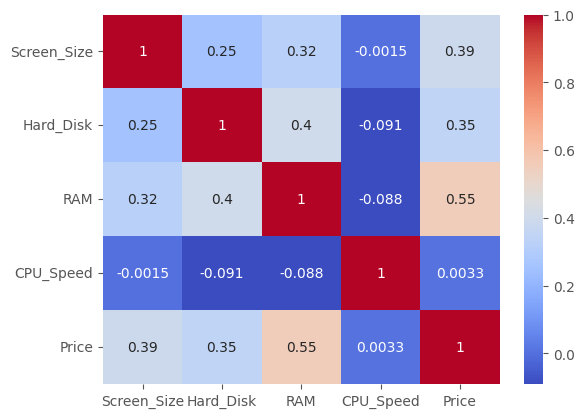

In [66]:
df_filled = df.fillna(0)
columns_for_heatmap = ['Screen_Size', 'Hard_Disk', 'RAM', 'CPU_Speed', 'Price']
heat_map = sns.heatmap(df_filled[columns_for_heatmap].corr(), annot=True, cmap='coolwarm')
plt.show()

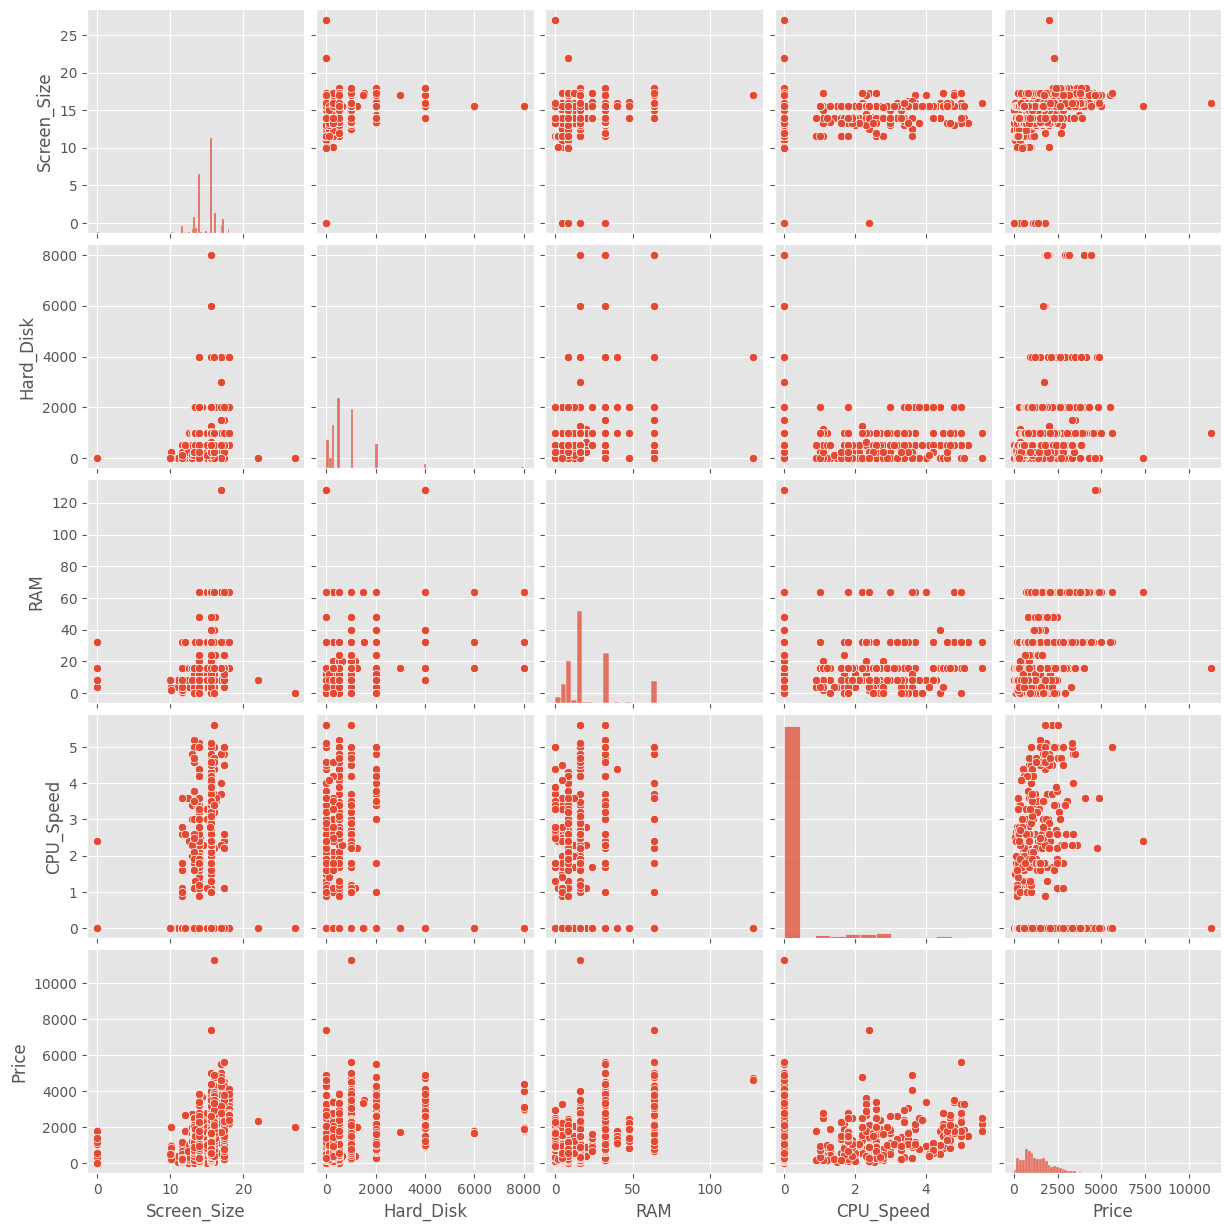

In [67]:
df_filled = df.fillna(0)
numerical_variables = ['Screen_Size', 'Hard_Disk', 'RAM', 'CPU_Speed', 'Price']
sns.pairplot(df_filled[numerical_variables])
plt.show()

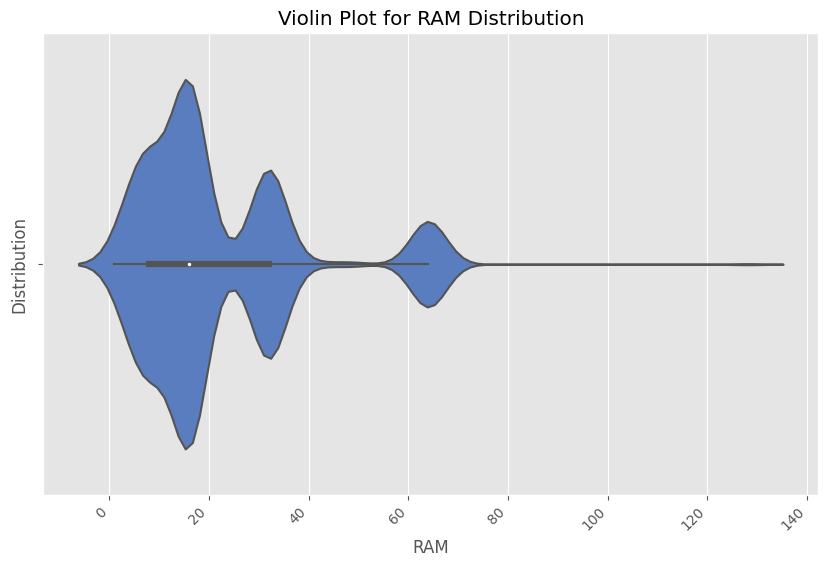

In [68]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='RAM', data=df, palette='muted')
plt.xticks(rotation=45, ha='right')  
plt.title('Violin Plot for RAM Distribution')
plt.xlabel('RAM')
plt.ylabel('Distribution')

plt.show()

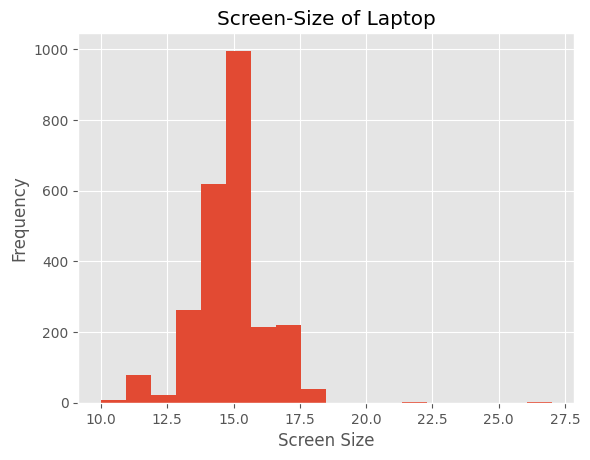

In [78]:
ax = df['Screen_Size'].plot(kind='hist',bins = 18 ,title='Screen-Size of Laptop')
ax.set_xlabel('Screen Size')
ax.set_ylabel('Frequency')

plt.show()